# Laboratorio 7

### Gabriel Alejandro Vicente Lorenzo 20498

### Codigo proporcionado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [6]:
path = r'.\malimg_dataset\malimg_paper_dataset_imgs'

In [7]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [8]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [9]:
imgs, labels = next(familias)

In [10]:
imgs.shape

(9339, 64, 64, 3)

In [11]:
labels.shape

(9339, 25)

In [12]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

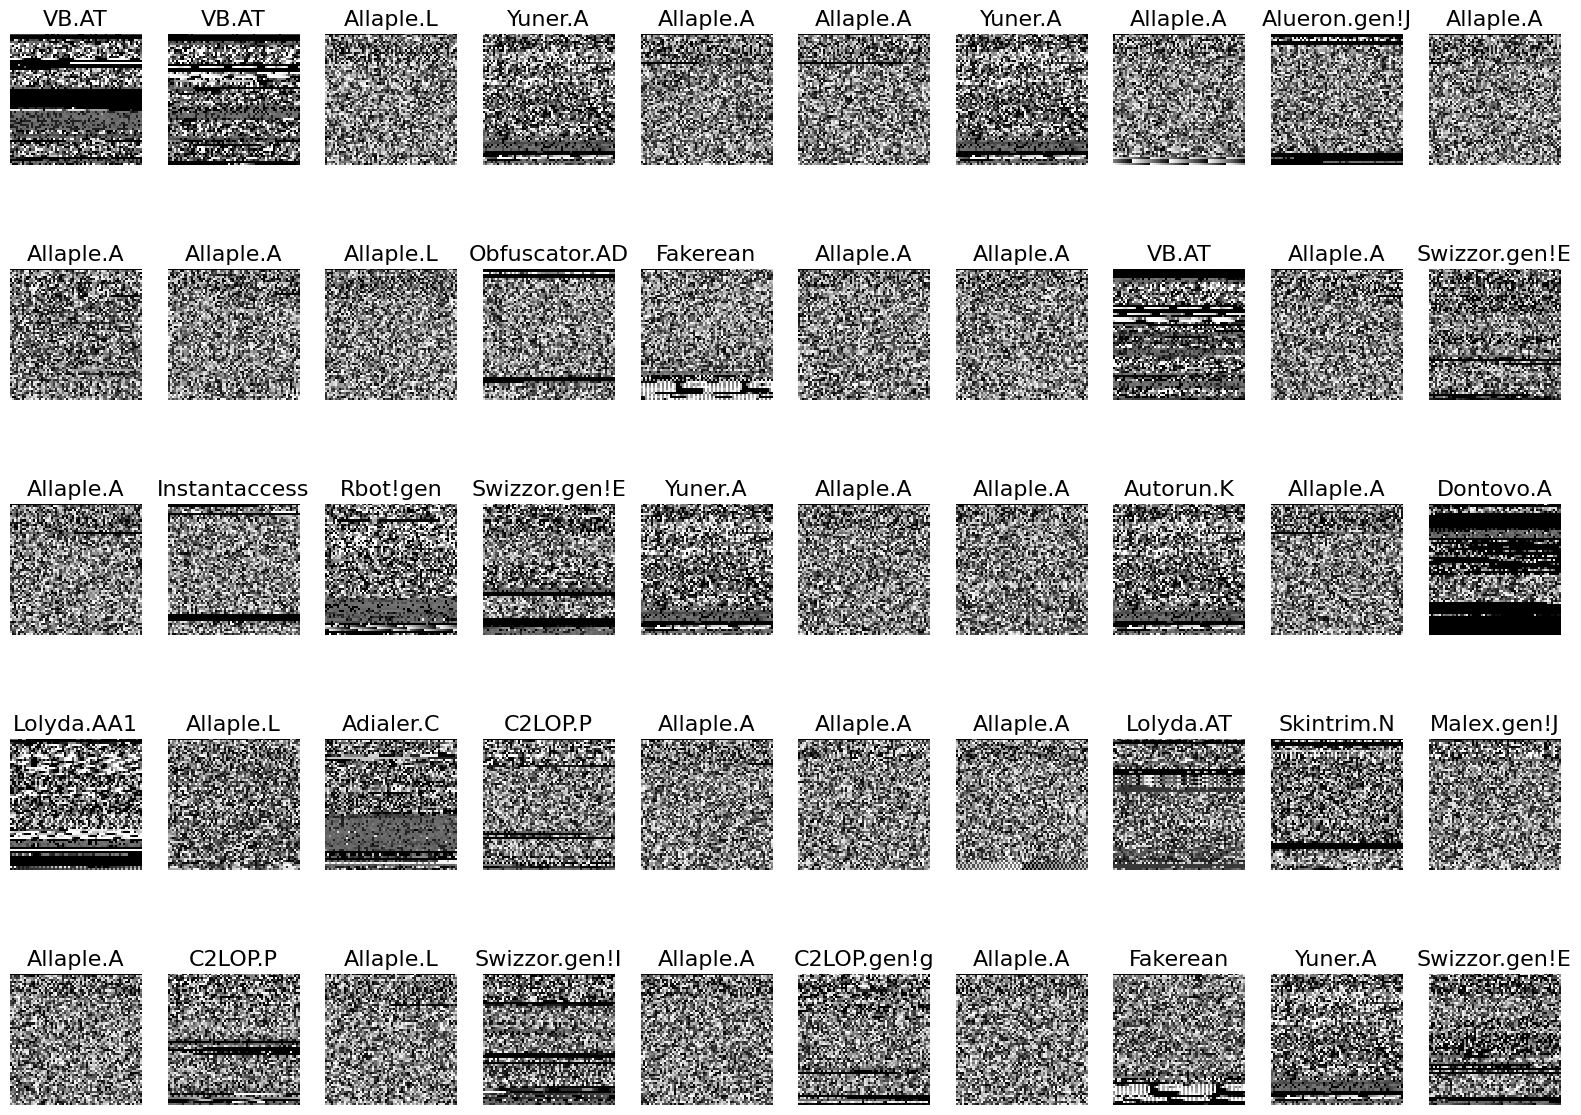

In [13]:

plots(imgs, titles = labels)

### Primera parte
Se utilizará el dataset proporcionado en Canvas (maligm_dataset.zip), que contiene imágenes en
formato .PNG de 25 familias distintas de malware. Debe realizarse el pre-procesamiento
especialmente en el conteo de observaciones por familia. Considere prescindir de familias que tengan
pocas observaciones. Plotee las imágenes de malware.
Tip: Utilice el jupyter proporcionado de guía para separa las familias de malware.
Luego construya una red neuronal con las capas/función de activación/optimizador que considere
convenientes. Trabaje con 70% entrenamiento y un 30% pruebas, con el número de épocas que
considere conveniente (siempre que no ocurra sobreajuste). Muestra las métricas del modelo. Guarde
su modelo.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Desarrollo de una red neuronal'

# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=42)

# Definición del modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')  # 25 clases
])

# Compilación del modelo
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

# Guardar el modelo
model.save("modelo_malware.h5")

Epoch 1/10
205/205 [==============================] - 21s 96ms/step - loss: 2.5035 - accuracy: 0.5928 - val_loss: 0.6526 - val_accuracy: 0.7787
Epoch 2/10
205/205 [==============================] - 21s 101ms/step - loss: 0.4889 - accuracy: 0.8527 - val_loss: 0.5262 - val_accuracy: 0.8262
Epoch 3/10
205/205 [==============================] - 20s 99ms/step - loss: 0.2836 - accuracy: 0.9168 - val_loss: 0.2272 - val_accuracy: 0.9368
Epoch 4/10
205/205 [==============================] - 20s 96ms/step - loss: 0.1624 - accuracy: 0.9506 - val_loss: 0.1623 - val_accuracy: 0.9529
Epoch 5/10
205/205 [==============================] - 22s 107ms/step - loss: 0.1223 - accuracy: 0.9622 - val_loss: 0.1823 - val_accuracy: 0.9554
Epoch 6/10
205/205 [==============================] - 24s 119ms/step - loss: 0.1163 - accuracy: 0.9639 - val_loss: 0.1905 - val_accuracy: 0.9543
Epoch 7/10
205/205 [==============================] - 24s 115ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.1634 - val_accur

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save("modelo_malware")

INFO:tensorflow:Assets written to: modelo_malware\assets


INFO:tensorflow:Assets written to: modelo_malware\assets


### Segunda parte
Implemente dos ataques (de diferente categoría), utilizando el framework Adversarial Robustness
ToolBox, originalmente desarrollador por IBM, y donado recientemente a The Linux Foundation.
https://adversarial-robustness-toolbox.org/
Este framework contiene módulos de ataque y defensa, métricas, etc; y soporta framewroks como
TensorFlow, Keras, Scikit-Learn, PyTorch, etc., todo tipo de data (imágenes, tablas, video, etc.) y tareas
de machine learning (clasificación, generación, etc.)
El modelo víctima del ataque será el modelo desarrollado en la primera parte.
Sugerencia: instalar el ART framework y probar los ejemplos vistos en clase, antes de realizar los
ataques sobre el modelo víctima, para asegurar que la herramienta fue instalada correctamente y que
funciona sin problemas.




### Ataque 1: DEEP FOOL

#### Categoria: ataques de evasión
El ataque DeepFool es una estrategia sofisticada dentro del campo de los ataques adversariales en el aprendizaje automático. A diferencia de otros métodos que operan directamente sobre los datos de entrada, DeepFool se basa en una estrategia iterativa que explora la función de decisión del modelo. Su objetivo es encontrar la perturbación mínima necesaria para inducir una clasificación errónea en el modelo. Para lograr esto, DeepFool calcula la distancia de la imagen actual a los hiperplanos de decisión del modelo para cada clase, seleccionando la clase con la distancia mínima. Luego, calcula la perturbación necesaria para mover la imagen a través del hiperplano de decisión de esa clase. Este proceso se repite iterativamente hasta que la imagen se clasifica incorrectamente o hasta que se alcanza un límite predefinido de iteraciones. Debido a su capacidad para encontrar perturbaciones muy pequeñas, DeepFool es considerado uno de los ataques más efectivos y desafiantes en el campo de la seguridad del aprendizaje automático.

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from art.attacks.evasion import  DeepFool
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()
# Carga del modelo entrenado
model = tf.keras.models.load_model('modelo_malware')

# Carga de datos
path = r'.\malimg_dataset\malimg_paper_dataset_imgs'
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64, 64), batch_size=10000)
imgs, labels = next(familias)

# Calcular los valores mínimos y máximos de las imágenes en X_train y X_test del primer código
min_value = np.min(imgs)
max_value = np.max(imgs)

print("Valor mínimo de las imágenes:", min_value)
print("Valor máximo de las imágenes:", max_value)


# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=42)

# Convertir el modelo Keras a un clasificador compatible con ART
classifier = KerasClassifier(model=model, clip_values=(0, 255))




Found 9339 images belonging to 25 classes.
Valor mínimo de las imágenes: 0.0
Valor máximo de las imágenes: 255.0


In [4]:

# Ataque 1: DeepFool
attack_deepfool = DeepFool(classifier=classifier, max_iter=100, epsilon=0.1)




In [5]:
X_test_adv_deepfool = attack_deepfool.generate(X_test)

# _, acc_deepfool = model.evaluate(X_test_adv_deepfool, y_test)

# print("Accuracy after DeepFool attack:", acc_deepfool)

# plt.imshow(X=X_test_adv_deepfool[0])

DeepFool:   0%|          | 0/2802 [00:00<?, ?it/s]

Accuracy after DeepFool attack: 0.050678086


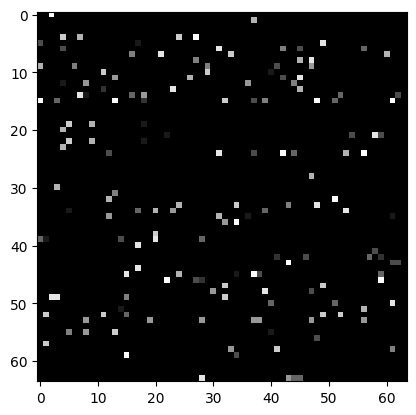

In [7]:
import matplotlib.pyplot as plt
_, acc_deepfool = model.evaluate(X_test_adv_deepfool, y_test)

print("Accuracy after DeepFool attack:", acc_deepfool)

plt.imshow(X=X_test_adv_deepfool[0])

In [16]:
from sklearn.model_selection import train_test_split

# Dividir X_test y y_test en X_test_15 y y_test_15
X_test_15, _, y_test_15, _ = train_test_split(X_test, y_test, test_size=0.90, random_state=42)

# Imprimir la forma de X_test_15 y y_test_15 para verificar los tamaños
print("Tamaño de X_test_15:", X_test_15.shape)
print("Tamaño de y_test_15:", y_test_15.shape)


Tamaño de X_test_15: (280, 64, 64, 3)
Tamaño de y_test_15: (280, 25)


DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/280 [00:00<?, ?it/s]

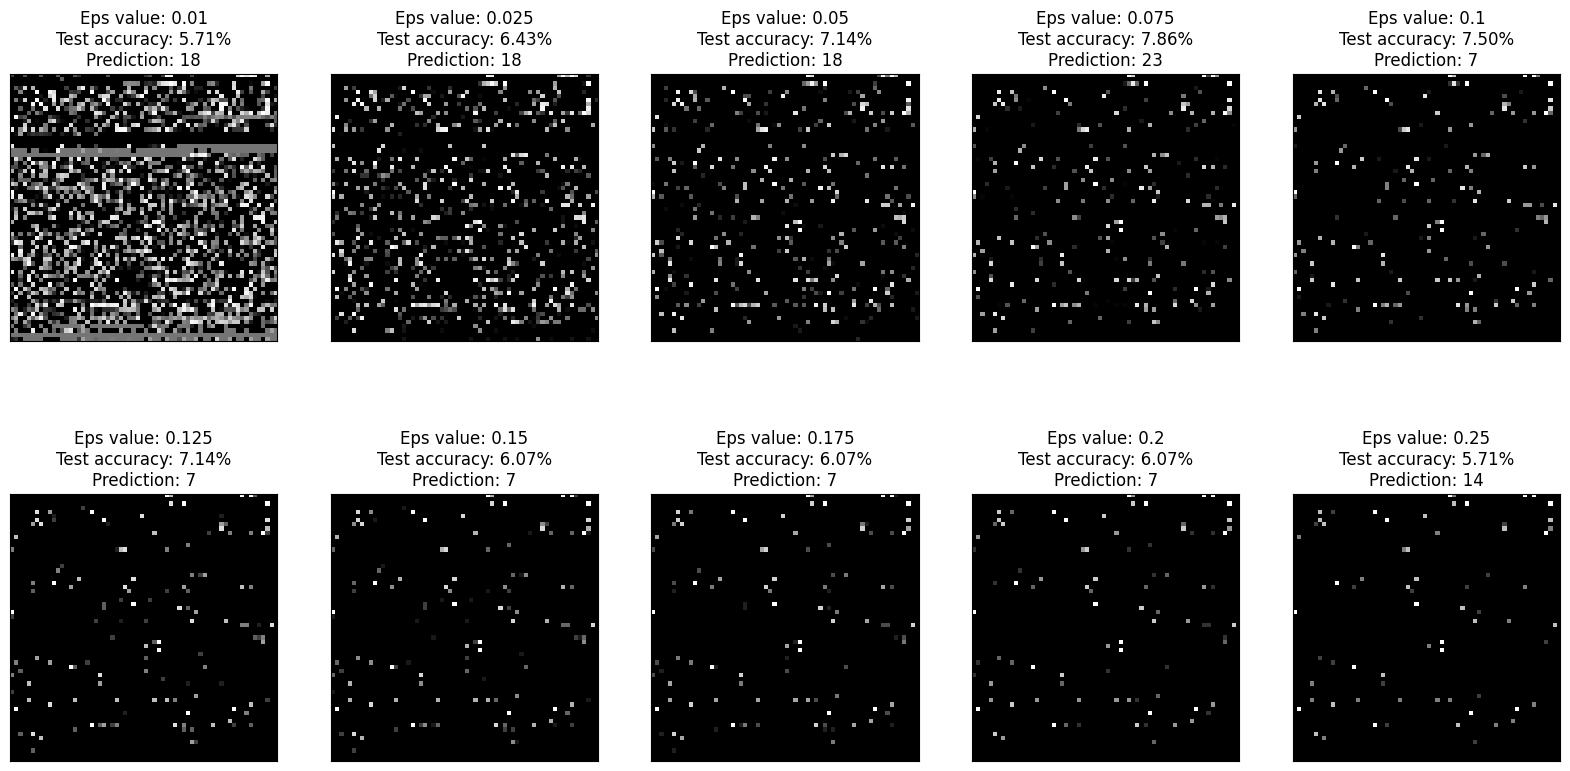

In [18]:
#Se prueba el accuracy para distintos valores de epsilon

# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = DeepFool(
            classifier=classifier, 
            epsilon=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=X_test_15)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0])

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = classifier._model.evaluate(
            x=test_images_adv, 
            y=y_test_15
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()